    # Assignment 1: Introduction to Data Science and Python

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.core.display import Image
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import pydotplus

## Contributors:
### Lukas Andersson - XX Hours
### Ramapriya Navalpakkam - XX hours

## 1.

### a.
COMMNET: Entries 25, 35, 46, 41, 10, 50, 20 were deleted on the second graph  

Coefficient: 30685.985917899194 Intercept: 1092324.212123067


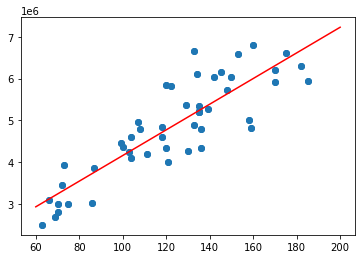

In [3]:
x = []
y = []

df = pd.read_csv('../data/data_assignment2_clean.csv')

for index, row in df.iterrows():
    x.append(row['Living_area'])
    y.append(row['Selling_price'])
    
plt.plot(x, y, 'o')
    
model = np.polyfit(x, y, 1)
predict = np.poly1d(model)

x_lin_reg = np.linspace(60.0, 200.0, num=49)
y_lin_reg = predict(x_lin_reg)

plt.scatter(x, y)
plt.plot(x_lin_reg, y_lin_reg, c = 'r')

print("Coefficient: " + str(model[0]) + " Intercept: " + str(model[1]))

### b.  
  
The coeefficient of the graph above is 30685.98591789919 while the intercept is 1092324.2121230674

### c.  
  
According to our predictions, 100 would be 4160922.803912986, 150 would be 5695222.099807946 and 200 would be 7229521.395702905.

In [4]:
predictions = [predict(100), predict(150), predict(200)]
               
print(predictions)

[4160922.803912986, 5695222.099807946, 7229521.395702906]


### d.

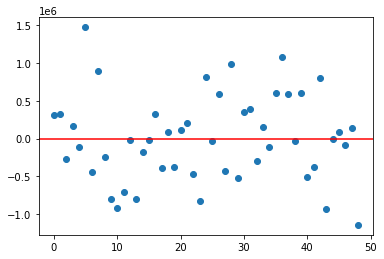

In [5]:
linspace = range(0, 49)

resy = []

for i in linspace:
    resy.append(y[i] - predict(x[i]))
    
plt.scatter(linspace, resy)
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

### e.

## 2.



### a.
The Decision tree is generated for the Iris data set and show as below :

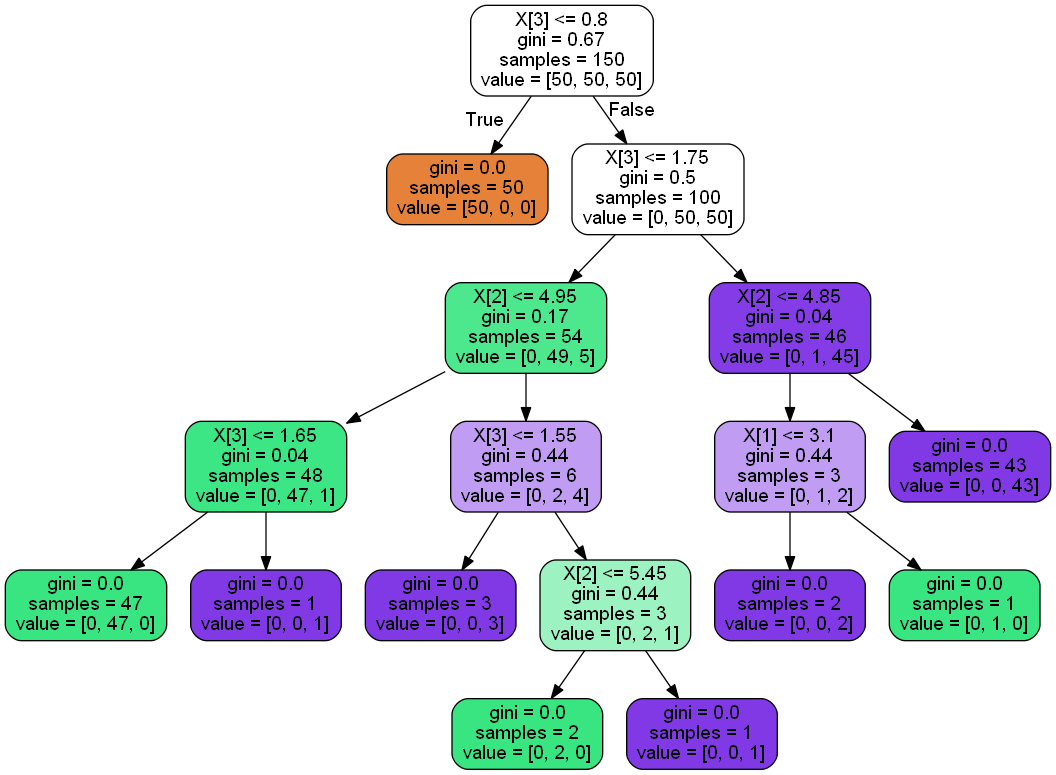

In [6]:
X, y = datasets.load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier(random_state=0)

clf.fit(X, y)

y_pred = clf.predict(X_test) #protesterar

# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None, rounded = True, proportion = False, precision = 2, filled = True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

The accuracy of the classification is evaluated using a confusion matrix


In [7]:
confusion_matrix(y_test, y_pred)


array([[14,  0,  0],
       [ 0, 18,  0],
       [ 0,  0, 13]], dtype=int64)

This datasets can be classified into 3 different types of irises namely Setosa, Versicolour, and Virginica. The confusion matrix checks if the predicted values align with the true values. The rows represent if the true values and the columns represent the predicted values. In the confusion matrix generated for the classification by the decision tree, we see that all the predicted values for the different classes correctly align with the true values. The values other than the diagonal are 0 which means there are no False positives or false negatives in the results obtained. Checking the accuracy of the model, we get 1.0 which is a 100% accurate model.

### b.
COMMENT : Is there anything else we need to change in the setting ? Or just K values ?

In [8]:
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

knn.fit(X_train, y_train)

y_pred_cf = knn.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_cf))

print(X_test[10])

print(knn.predict([X_test[10]]))

print(y_test[10])

#k = Sample size
knn1 = KNeighborsClassifier(n_neighbors=105, metric='euclidean')

knn1.fit(X_train, y_train)

y_pred_cf1 = knn1.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_cf1))

print(knn1.predict([X_test[10]]))

Accuracy: 0.9777777777777777
[5.6 2.7 4.2 1.3]
[1]
1
Accuracy: 0.28888888888888886
[2]


### c.

In [9]:
confusion_matrix(y_test, y_pred_cf)

array([[14,  0,  0],
       [ 0, 18,  0],
       [ 0,  1, 12]], dtype=int64)

In [10]:
confusion_matrix(y_test, y_pred_cf1)

array([[ 0,  0, 14],
       [ 0,  0, 18],
       [ 0,  0, 13]], dtype=int64)

## 3.